# Coordinates and Dimensions of ECCOv4 NetCDF files

## Objectives

Introduce the student to the idea that the ECCO v4 NetCDF fields have coordinate labels which shows *where* these fields are on the Arakawa-C grid.

## Introduction

The ECCOv4 files are provided as NetCDF files.  The file you have may look a little different than the ones shown here because we have been working hard at improving how what exactly goes into our NetCDF files.  

Before you begin, make sure you have the monthly mean temperature/salinity files for 2010 downloaded. If you have done the previous tutorial about Dataset and DataArray objects, you already have these; if not, you should run at least the first code cell of that tutorial before this one.

As we showed in the previous tutorial, we can use the `open_mfdataset` method from `xarray` to load multiple NetCDF files into Python as a `Dataset` object.  `open_mfdataset` is very convenient because it automatically parses and concatenates NetCDF files, constructing a `Dataset` object using all of the  dimensions, coordinates, variables, and metadata information.  

In the last tutorial we analyzed the contents of the ECCOv4 monthly mean potential temperature and salinity files for the year 2010.  Let's load these files up again as the `Dataset` object *theta_dataset*.

In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import json

## Import the ecco_v4_py library into Python
## =========================================
## -- If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it. The code below adds the ECCOv4-py
##    folder under the user's home directory to the path.
from os.path import expanduser,join
import sys
user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'Github/ECCOv4-py'))
import ecco_v4_py as ecco

## All ECCOv4 coordinates

Now that we have been oriented to the dimensions and coordinates used by ECCOv4, let's examine a ``Dataset`` that uses all of them, an ECCOv4r4 NetCDF grid file. The grid file for the native LLC90 grid has ShortName **ECCO_L4_GEOMETRY_LLC0090GRID_V4R4**. It does not have time dimensions, but we can put any StartDate and EndDate between 1992-01-01 and 2018-01-01 into the `ecco_podaac_download` function and it should download the file.

In [2]:
from os.path import basename, isfile, isdir, join, expanduser

user_home_dir = expanduser('~')

from ecco_download import *

grid_params_shortname = "ECCO_L4_GEOMETRY_LLC0090GRID_V4R4"

# ecco_podaac_download(ShortName=grid_params_shortname,\
#                     StartDate="2010-01-01",EndDate="2010-01-01",download_root_dir=None,\
#                     n_workers=6,force_redownload=False)

In [3]:
# user_home_dir
join(user_home_dir,'Downloads/ECCO_V4r4_PODAAC/')
# join(user_home_dir,'Github/ECCOv4-py')

'/Users/zengzien/Downloads/ECCO_V4r4_PODAAC/'

Open the ECCOv4r4 grid file:

In [4]:
ECCO_dir = join(user_home_dir, 'Downloads/ECCO_V4r4_PODAAC/')
grid_params_file = "GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc"
grid_params_file_path = join(ECCO_dir,grid_params_shortname,grid_params_file)

# open grid parameters file
grid_dataset = xr.open_dataset(grid_params_file_path)

# show contents of grid_dataset
grid_dataset

<xarray.Dataset> Size: 89MB
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
              k_p1: 51, tile: 13, nb: 4, nv: 2)
Coordinates: (12/20)
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    ...       ...
    Zp1      (k_p1) float32 204B ...
    Zu       (k_u) float32 200B ...
    Zl       (k_l) float32 200B ...
    XC_bnds  (tile, j, i, nb) float32 2MB ...
    YC_bnds  (tile, j, i, nb) float32 2MB ...
    Z_bnds   (k, nv) float32 400B ...
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 421kB ...
    SN       (tile, j, i) float32 421kB ...
    rA       (tile, j, i) float32 421kB ...
    dxG      (tile, j_g, i) float32 421kB ...
    dyG      (tile, j, i_g) float32 421kB ...
    Depth    (tile, j, i) float32 421kB ...
    ...       ...
    hFacC    (k, tile, j, i) float32 21MB ...
    hFacW    (k, tile, j, i_g) float32 21MB ...
    hFacS    (k, tile, j_g, i) float32 21MB ...
    maskC    (k, tile, j, i) bool 5MB ...
    maskW    (k, tile, j, i_g) bool 5MB ...
    maskS    (k, tile, j_g, i) bool 5MB ...
Attributes: (12/58)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

You'll notice that the dimensions and coordinates of the grid file are the same as for the potential temperature/salinity files we looked at before, except that there is no time dimension or time-related coordinates.  Let's move on to the **Data variables**, which in this file are parameters associated with the grid.


### Grid Parameters

There are 21 data variables in the grid file.  These grid parameters describe the model grid geometry, and are essential for quantitative analysis with ECCO output.

axis rotation factors:
```
    CS       (tile, j, i)   float32 ...
    SN       (tile, j, i)   float32 ...
```

horizontal distances:
```
    dxG      (tile, j_g, i) float32 ...
    dyG      (tile, j, i_g) float32 ...
    dxC      (tile, j, i_g) float32 ...
    dyC      (tile, j_g, i) float32 ...
```

vertical distances:
```
    drC      (k_p1) float32 ...
    drF      (k) float32 ...
```        

areas:
```
    rA       (tile, j, i) float32 ...
    rAz      (tile, j_g, i_g) float32 ...
    rAw      (tile, j, i_g) float32 ...
    rAs      (tile, j_g, i) float32 ...
```

reference hydrostatic pressure at cell depth:
```
    PHrefC   (k) float32 ...
    PHrefF   (k_p1) float32 ...
```

partial cell fractions:
```
    hFacC    (k, tile, j, i) float32 ...
    hFacW    (k, tile, j, i_g) float32 ...
    hFacS    (k, tile, j_g, i) float32 ...
```

wet/dry boolean masks:
```
    maskC    (k, tile, j, i) bool ...
    maskW    (k, tile, j, i_g) bool ...
    maskS    (k, tile, j_g, i) bool ...
```

seafloor depth:
```
Depth    (j, i) float32 ...
```



Grid parameters are not coordinates in the sense that they help you orient in space or time, but they provide measures of the model grid such as distances and areas.  Let's examine one of these grid geometric variables, *dxG*:

In [5]:
grid_dataset.dxG

<xarray.DataArray 'dxG' (tile: 13, j_g: 90, i: 90)> Size: 421kB
[105300 values with dtype=float32]
Coordinates:
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:              distance between 'southwest' and 'southeast' corn...
    units:                  m
    coordinate:             YG XC
    coverage_content_type:  modelResult
    comment:                Alternatively, the length of 'south' side of trac...

``dxG`` has coordinates **tile**, **j_g** and **i** which means that it is a **v** location variable.  ``dxG`` is the horizontal distance between $g$ points (tracer cell corners) in the tile's $x$ direction.  

For reference, see the chart below from the MITgcm documentation, [Figure 2.6](https://mitgcm.readthedocs.io/en/latest/algorithm/horiz-grid.html "Fig 2.6")

dxG = $\Delta x_g$ in subfigure (a) below:

![hgrid](../figures/hgrid-abcd.svg)

*Figure 2.6 Staggering of horizontal grid descriptors (lengths and areas). The grid lines indicate the tracer cell boundaries and are the reference grid for all panels. a) The area of a tracer cell, 𝐴𝑐, is bordered by the lengths Δ𝑥𝑔 and Δ𝑦𝑔. b) The area of a vorticity cell, 𝐴𝜁, is bordered by the lengths Δ𝑥𝑐 and Δ𝑦𝑐. c) The area of a u cell, 𝐴𝑤, is bordered by the lengths Δ𝑥𝑣 and Δ𝑦𝑓. d) The area of a v cell, 𝐴𝑠, is bordered by the lengths Δ𝑥𝑓 and Δ𝑦𝑢.*

## Dimensions and Coordinates of Velocities

So far we looked at files with *THETA* and *SALT* which are $c$ variables (i.e. tracers).  Let's examine *UVEL*, horizontal velocity in the tile's $x$ direction.  As you've probably guessed, *UVEL* is a $u$ variable: 

Let's download and open the March 2010 mean horizontal velocity.

In [6]:
# download file containing monthly mean ocean velocities for March 2010
# vel_shortname = "ECCO_L4_OCEAN_VEL_LLC0090GRID_MONTHLY_V4R4"
vel_shortname = "ECCO_L4_OCEAN_VEL_LLC0090GRID_DAILY_V4R4"
ecco_podaac_download(ShortName=vel_shortname,\
                    StartDate="2017-01-01",EndDate="2017-01-01",\
                    download_root_dir=None,n_workers=6,force_redownload=False)

created download directory /Users/zengzien/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_OCEAN_VEL_LLC0090GRID_DAILY_V4R4
{'ShortName': 'ECCO_L4_OCEAN_VEL_LLC0090GRID_DAILY_V4R4', 'temporal': '2017-01-01,2017-01-01'}

Total number of matching granules: 2

OCEAN_VELOCITY_day_mean_2016-12-31_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_day_mean_2017-01-01_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 7061.12it/s]


total downloaded: 0.0 Mb
avg download speed: 0.0 Mb/s


In [7]:
# find the name of the file just downloaded
import glob
curr_dir = join(ECCO_dir,vel_shortname)
file_to_load = list(glob.glob(join(curr_dir,'*2017-01-01*nc')))[0]

# load file into workspace
vel_dataset = xr.open_dataset(file_to_load)
vel_dataset.attrs = []
vel_dataset

<xarray.Dataset> Size: 68MB
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
                k_p1: 51, tile: 13, time: 1, nv: 2, nb: 4)
Coordinates: (12/22)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...         ...
    Zu         (k_u) float32 200B ...
    Zl         (k_l) float32 200B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
    XC_bnds    (tile, j, i, nb) float32 2MB ...
    YC_bnds    (tile, j, i, nb) float32 2MB ...
    Z_bnds     (k, nv) float32 400B ...
Dimensions without coordinates: nv, nb
Data variables:
    UVEL       (time, k, tile, j, i_g) float32 21MB ...
    VVEL       (time, k, tile, j_g, i) float32 21MB ...
    WVEL       (time, k_l, tile, j, i) float32 21MB ...

Notice that each of the velocity variables are centered at different locations, and none of them are at the center of the grid cell (k, tile, j, i).  ``UVEL`` has the **i_g** dimension, indicating that it is on the edge of each tracer cell along the $i$ axis.  ``VVEL`` has the **j_g** dimension, indicating that it is on the edge of each tracer cell along the $j$ axis.  ``WVEL`` has the **k_l** dimension, indicating that it is on the edge of each tracer cell along the $k$ (vertical) axis. 

Let's confirm this by looking at the dimensions and coordinates of each of the velocity files.

### ``UVEL``

In [8]:
vel_dataset.UVEL.dims

('time', 'k', 'tile', 'j', 'i_g')

In [9]:
vel_dataset.UVEL.coords

Coordinates:
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 8B 2017-01-01T12:00:00
    Z        (k) float32 200B ...

Plot tile 1 time-mean horizontal velocity in the tile's $x$ direction, at the top-most model grid cell.

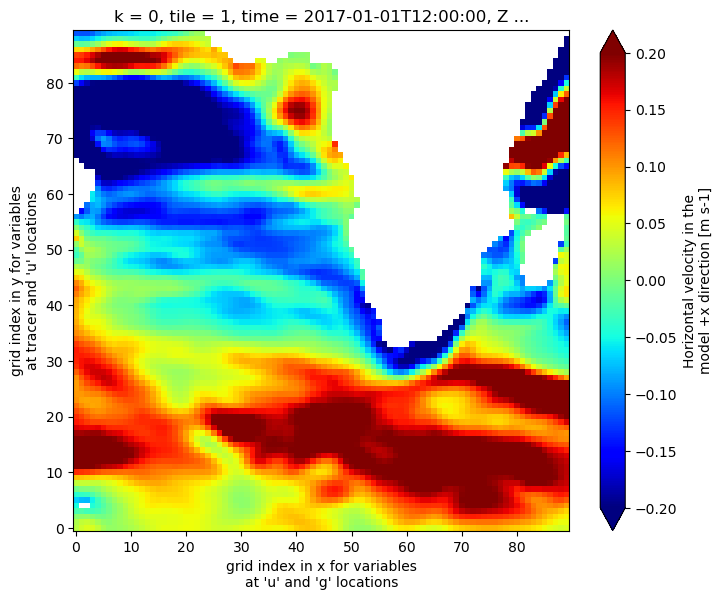

In [10]:
fig=plt.figure(figsize=(8, 6.5))
ud_masked = vel_dataset.UVEL.where(grid_dataset.hFacW > 0, np.nan)
ud_masked.isel(k=0,tile=1,time=0).plot(cmap='jet', vmin=-.2,vmax=.2)

### ``VVEL``

In [11]:
vel_dataset.VVEL.dims

('time', 'k', 'tile', 'j_g', 'i')

In [12]:
vel_dataset.VVEL.coords

Coordinates:
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 8B 2017-01-01T12:00:00
    Z        (k) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03

Plot the time-mean horizontal velocity in the tile's $y$ direction, at the top-most model grid cell.

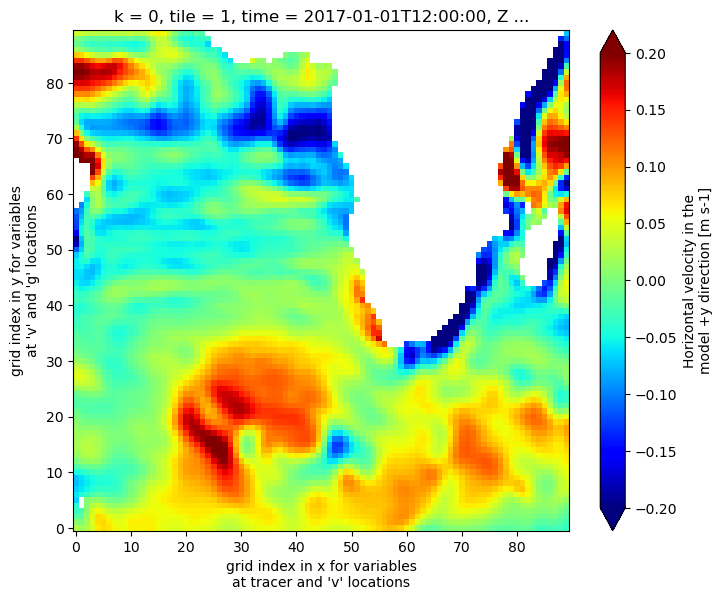

In [13]:
fig=plt.figure(figsize=(8, 6.5))
vd_masked = vel_dataset.VVEL.where(grid_dataset.hFacS > 0, np.nan)
vd_masked.isel(k=0,tile=1,time=0).plot(cmap='jet', vmin=-.2,vmax=.2)

### ``WVEL``

In [14]:
vel_dataset.WVEL.dims

('time', 'k_l', 'tile', 'j', 'i')

In [15]:
vel_dataset.WVEL.coords

Coordinates:
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) datetime64[ns] 8B 2017-01-01T12:00:00
    XC       (tile, j, i) float32 421kB ...
    YC       (tile, j, i) float32 421kB ...
    Zl       (k_l) float32 200B ...

Plot the time-mean vertical velocity on the tile, at the ocean surface.  Note that the vertical index we pass to `isel` is ```k_l=0``` rather than ```k=0```, corresponding to the vertical dimension and coordinate of `WVEL`.

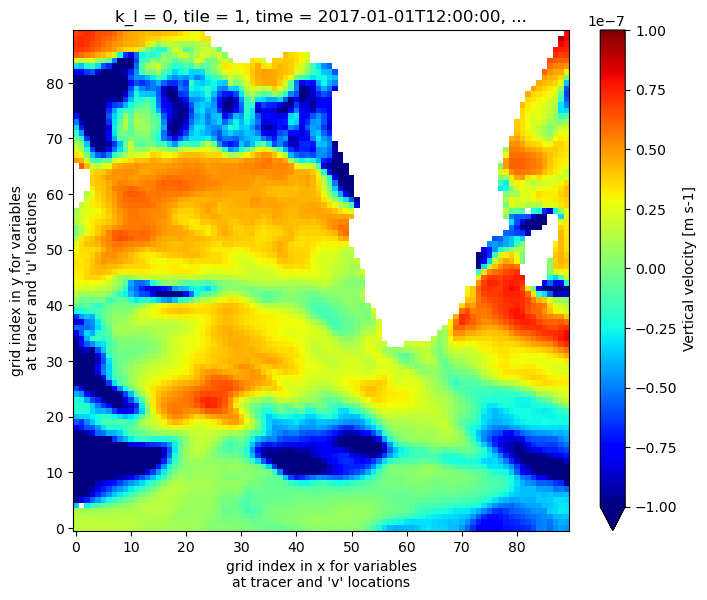

In [16]:
fig=plt.figure(figsize=(8, 6.5))
# use .values attribute below to avoid xarray getting confused about the different vertical dimensions (k_l vs. k)
wd_masked = vel_dataset.WVEL.where(grid_dataset.hFacC.values > 0, np.nan)
wd_masked.isel(k_l=0,tile=1,time=0).plot(cmap='jet', vmin=-1.e-7,vmax=1.e-7)

In [17]:
# Plot the time-mean horizontal velocity vector at some depth level.

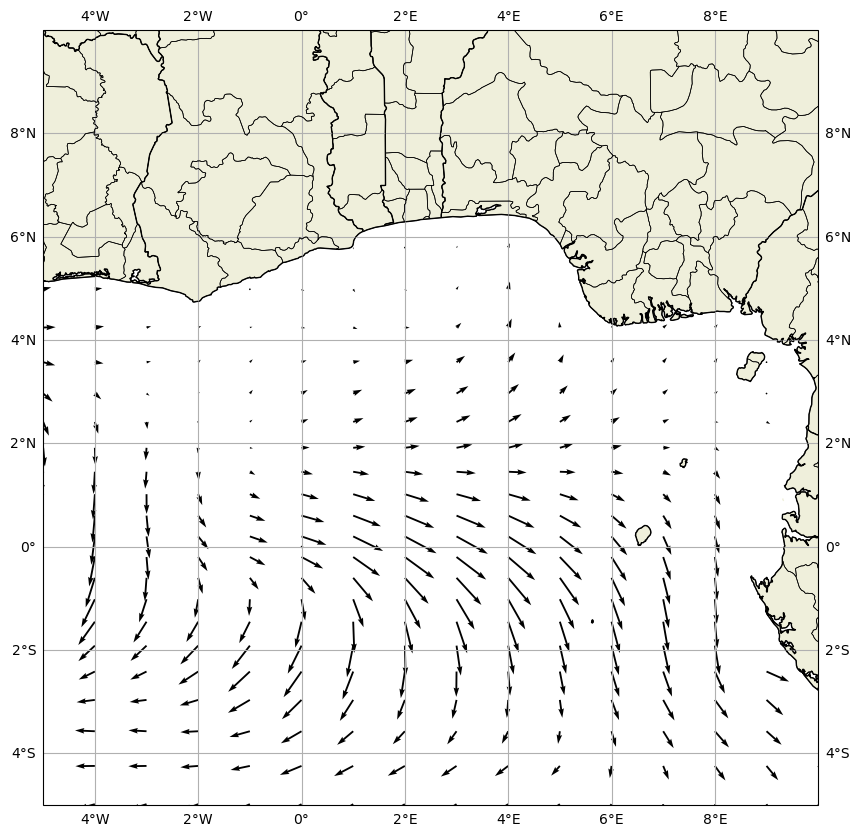

In [18]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.PlateCarree() #let's set the map's projection

fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(10, 20))#now we need to create a figure with the pre-set projection and a size

ax.set_extent([-5, 10, -5 ,10], crs=ccrs.PlateCarree())#let's limit the coordinates to have only the region of MODIS product


# '''Adding nice cartopy features'''
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1) 
# ax.add_feature(cfeature.LAKES,  alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
# ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.5)
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces',
            scale='10m', facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10, linestyle = '-', linewidth=0.5)


ax.gridlines(draw_labels=True)#formating the grid

# lon, lat = 0, 15 
# ax.plot(lon,lat,  'bo', markersize=6, color = 'red', transform=ccrs.Geodetic())#adding some random marker to the map

# fig=plt.figure(figsize=(8, 6.5))

nz=0 # which depth level to plot
ntile=1 # which tile to plot
ntime=0 # which time slice to plot

u_masked = vel_dataset.UVEL.where(grid_dataset.hFacW > 0, np.nan)
U_q = u_masked.isel(k=nz, tile=ntile, time=ntime)
v_masked = vel_dataset.VVEL.where(grid_dataset.hFacS > 0, np.nan)
V_q = v_masked.isel(k=nz, tile=ntile, time=ntime)
X_q = vel_dataset.XG.isel(tile=ntile)
Y_q = vel_dataset.YC.isel(tile=ntile)
plt.quiver(X_q, Y_q, U_q, V_q, scale=5)

# plt.savefig('velocity.png')


## Summary

ECCOv4 variables are on the staggered Arakawa-C grid.  Different dimension labels and coordinates are applied to state estimate variables so that one can easily identify where on the c-grid any particular variable is situated.


## Particle tracking

Now we have loaded the ocean current velocity fields, let's see what we can do with them!
Here is an example showing how particles move with ocean current.


In [19]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import json

## Import the ecco_v4_py library into Python
## =========================================
## -- If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it. The code below adds the ECCOv4-py
##    folder under the user's home directory to the path.
from os.path import expanduser,join
import sys
user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'Github/ECCOv4-py'))
import ecco_v4_py as ecco

In [20]:
# find the name of the 05DEG file
import glob
fiveDEG_dir = "/Users/zengzien/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_OCEAN_VEL_05DEG_DAILY_V4R4"
file_to_load = list(glob.glob(join(fiveDEG_dir,'*2017-01*nc')))[0]

# load file into workspace
vel_dataset = xr.open_dataset(file_to_load)
vel_dataset.attrs = []
vel_dataset

<xarray.Dataset> Size: 156MB
Dimensions:         (time: 1, Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 8B 2017-01-01T12:00:00
  * Z               (Z) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 1kB -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 3kB -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] 16B ...
    latitude_bnds   (latitude, nv) float32 3kB ...
    longitude_bnds  (longitude, nv) float32 6kB ...
    Z_bnds          (Z, nv) float32 400B ...
Dimensions without coordinates: nv
Data variables:
    EVEL            (time, Z, latitude, longitude) float32 52MB ...
    NVEL            (time, Z, latitude, longitude) float32 52MB ...
    WVEL            (time, Z, latitude, longitude) float32 52MB ...

In [21]:
import math
from datetime import timedelta
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from parcels import (
    AdvectionRK4,
    FieldSet,
    JITParticle,
    ParticleFile,
    ParticleSet,
    ScipyParticle,
    download_example_dataset,
)

In [22]:
from datetime import timedelta as delta

ptype = {"scipy": ScipyParticle, "jit": JITParticle}
# mode = "scipy"
mode = "jit"

# """Function that shows how to load MITgcm data in a zonally periodic domain."""

# data_folder = download_example_dataset("MITgcm_example_data")
# filenames = {
#     "U": f"{data_folder}/mitgcm_UV_surface_zonally_reentrant.nc",
#     "V": f"{data_folder}/mitgcm_UV_surface_zonally_reentrant.nc",}

data_folder = "/Users/zengzien/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_OCEAN_VEL_05DEG_DAILY_V4R4"
filenames = {
    "U": sorted(glob.glob(f"{data_folder}/OCEAN_VELOCITY_day_mean_2017-01-01_ECCO_V4r4_latlon_0p50deg.nc")),
    "V": sorted(glob.glob(f"{data_folder}/OCEAN_VELOCITY_day_mean_2017-01-01_ECCO_V4r4_latlon_0p50deg.nc")),}


variables = {"U": "EVEL", "V": "NVEL"}

dimensions = {
    "U": {"lon": "longitude", "lat": "latitude", "time": "time"},
    "V": {"lon": "longitude", "lat": "latitude", "time": "time"},
}

fieldset = FieldSet.from_mitgcm(filenames, variables, dimensions, mesh="flat", allow_time_extrapolation=True)
fieldset.add_periodic_halo(zonal=True)
fieldset.add_constant('domain_width', 360)

def periodicBC(particle, fieldset, time):
    if particle.lon < -180:
        particle_dlon += fieldset.domain_width  # noqa
    elif particle.lon > -180 + fieldset.domain_width:
        particle_dlon -= fieldset.domain_width  # noqa

# Release particles 5 cells away from the Eastern boundary
pset = ParticleSet.from_line(
    fieldset,
    pclass=ptype[mode],
    start=(np.float32(3), np.float32(-32)),
    finish=(np.float32(3), np.float32(-22)),
    size=11,
)

pfile = ParticleFile(
    "MIT_particles_" + str(mode) + ".zarr", pset, outputdt=delta(seconds=1), chunks=(len(pset), 1)
)

kernels = AdvectionRK4 + pset.Kernel(periodicBC)

pset.execute(
    kernels, runtime=delta(seconds=30), dt=delta(seconds=1), output_file=pfile 
)

INFO: Output files are stored in MIT_particles_jit.zarr.
100%|█████████████████████████████████████████████████████████████████████████████████████████████| 30.0/30.0 [00:00<00:00, 79.36it/s]


/Users/zengzien/opt/miniconda3/envs/coes/lib/python3.12/site-packages/trajan/plot/__init__.py:159: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  num = self.ds.dims['trajectory']


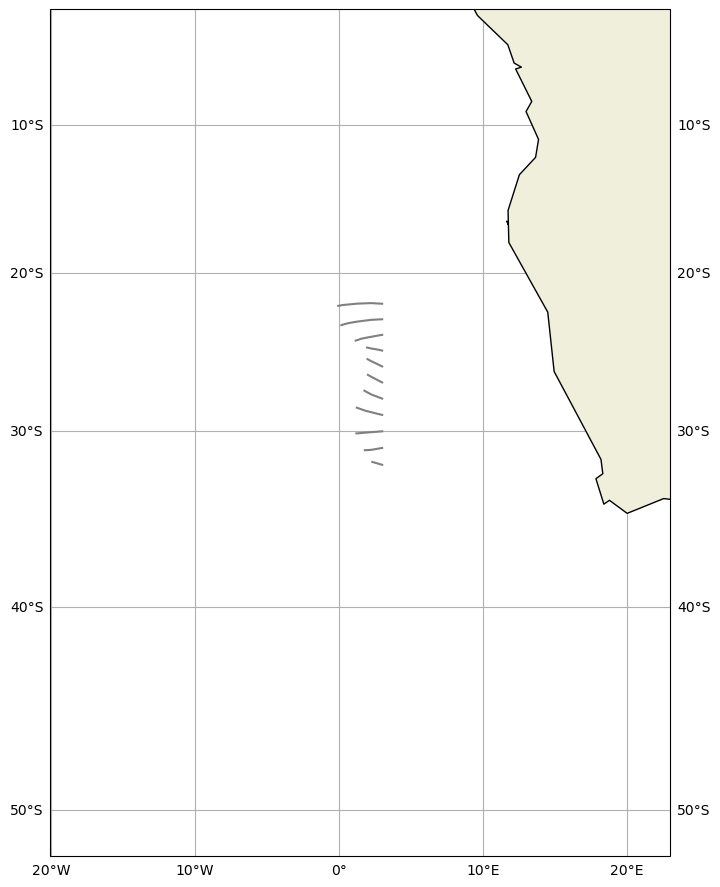

In [23]:
ds = xr.open_zarr("MIT_particles_jit.zarr")
ds.traj.plot(margin=20)
plt.show()

In [24]:
import math
from datetime import timedelta
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from parcels import (
    AdvectionRK4_3D,
    FieldSet,
    JITParticle,
    ScipyParticle,
    ParticleFile,
    ParticleSet,
    XarrayDecodedFilter,
    download_example_dataset,
    logger,
)

In [25]:
from datetime import timedelta as delta

ptype = {"scipy": ScipyParticle, "jit": JITParticle}
# mode = "scipy"
mode = "jit"

# """Function that shows how to load MITgcm data in a zonally periodic domain."""

# data_folder = download_example_dataset("MITgcm_example_data")
# filenames = {
#     "U": f"{data_folder}/mitgcm_UV_surface_zonally_reentrant.nc",
#     "V": f"{data_folder}/mitgcm_UV_surface_zonally_reentrant.nc",}

data_folder = "/Users/zengzien/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_OCEAN_VEL_05DEG_DAILY_V4R4"
filenames = {
    "U": sorted(glob.glob(f"{data_folder}/OCEAN_VELOCITY_day_mean_2017-01-01_ECCO_V4r4_latlon_0p50deg.nc")),
    "V": sorted(glob.glob(f"{data_folder}/OCEAN_VELOCITY_day_mean_2017-01-01_ECCO_V4r4_latlon_0p50deg.nc")),
    "W": sorted(glob.glob(f"{data_folder}/OCEAN_VELOCITY_day_mean_2017-01-01_ECCO_V4r4_latlon_0p50deg.nc")),}


variables = {"U": "EVEL", "V": "NVEL", "W": "WVEL"}

dimensions = {
    "U": {"lon": "longitude", "lat": "latitude", "depth": "Z", "time": "time"},
    "V": {"lon": "longitude", "lat": "latitude", "depth": "Z", "time": "time"},
    "W": {"lon": "longitude", "lat": "latitude", "depth": "Z", "time": "time"},
}

fieldset = FieldSet.from_mitgcm(filenames, variables, dimensions, mesh="flat", allow_time_extrapolation=True)
fieldset.add_periodic_halo(zonal=True)
fieldset.add_constant('domain_width', 360)

def periodicBC(particle, fieldset, time):
    if particle.lon < -180:
        particle_dlon += fieldset.domain_width  # noqa
    elif particle.lon > -180 + fieldset.domain_width:
        particle_dlon -= fieldset.domain_width  # noqa

# Release particles at certain (lon, lat) positions
pset = ParticleSet.from_line(
    fieldset,
    pclass=ptype[mode],
    start=(np.float32(5), np.float32(0)),
    finish=(np.float32(5), np.float32(5)),
    size=20,
    depth=-100,
)

pfile = ParticleFile(
    "MIT_particles_" + str(mode) + ".zarr", pset, outputdt=delta(seconds=100), chunks=(len(pset), 1)
)

kernels = AdvectionRK4_3D + pset.Kernel(periodicBC)

pset.execute(
    kernels, runtime=delta(seconds=2000), dt=delta(seconds=1), output_file=pfile 
)

INFO: Output files are stored in MIT_particles_jit.zarr.
100%|███████████████████████████████████████████████████████████████████████████████████████| 2000.0/2000.0 [00:00<00:00, 2316.24it/s]


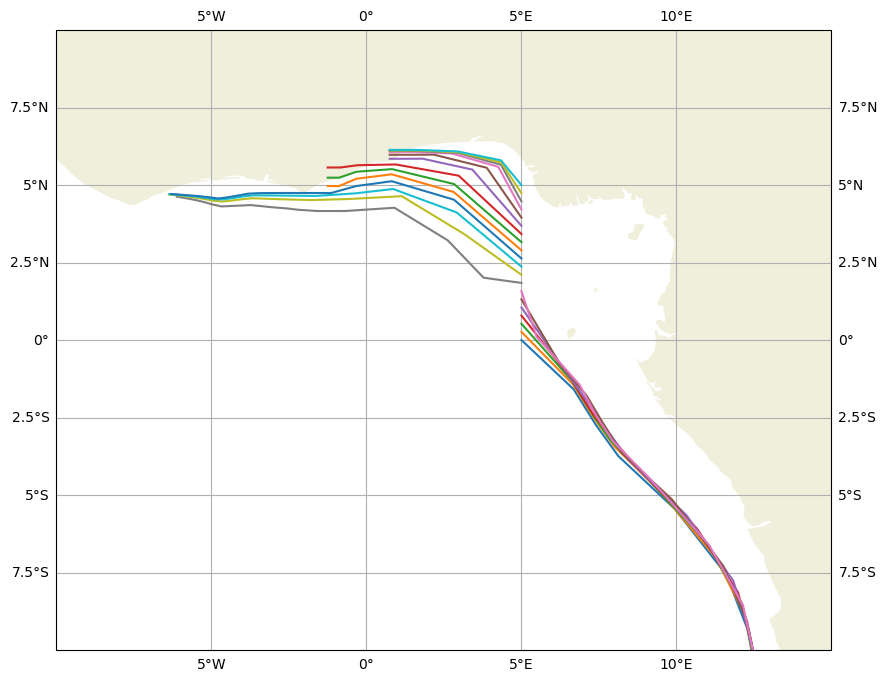

In [26]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.PlateCarree() #let's set the map's projection

fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(10, 20))#now we need to create a figure with the pre-set projection and a size

ax.set_extent([-10, 15, -10 ,10], crs=ccrs.PlateCarree())#let's limit the coordinates to have only the region of MODIS product


# '''Adding nice cartopy features'''
ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
# ax.add_feature(states_provinces, edgecolor='black', zorder=10, linestyle = '-', linewidth=0.5)


ax.gridlines(draw_labels=True)#formating the grid

ds = xr.open_zarr("MIT_particles_jit.zarr")
plt.plot(ds.lon.T, ds.lat.T)

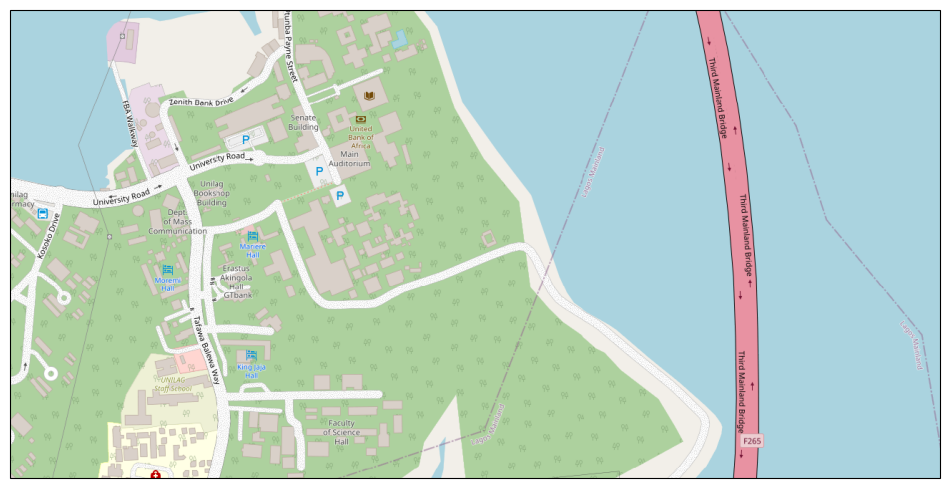

In [27]:
# Mapping Open Street Map (OSM) with Cartopy
# This code uses a spoofing algorithm to avoid bounceback from OSM servers
#
import matplotlib.pyplot as plt 
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.OSM() # spoofed, downloaded street map

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [6.5179, 3.4014] # lat/lon of Unilag
zoom = 0.0035 # for zooming out of center point
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax1.set_extent(extent) # set extents

scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification
# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings
plt.show() # show the plot